In [117]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('heart-disease.csv')

x = data.iloc[:, :-1].values
y = data.iloc[:,-1].values.reshape(-1,1)
y = y.reshape(len(y),1)

# Normalising input features
scaler = StandardScaler()
x = scaler.fit_transform(x)

print(x.shape)
print(y.shape)

# Train / Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

# Activation Functions
def sigmoid(v):
    return 1/(1+np.exp(-v))

def sigmoid_deriv(v):
    # derivative = sigmoid(v)*(1 - sigmoid(v))
    s = sigmoid(v)
    return s * (1 - s)

# Added ReLu function
def ReLu(v):
    return np.maximum(0, v)

def ReLu_deriv(v):
    # Return 0 for negative v, 1 for positive v.
    out = np.ones_like(v)
    out[v <= 0] = 0
    return out

# Leaky ReLu not used in final training here
def leaky_ReLu(v):
    return np.where(v > 0, v, 0.01*v)

def leaky_ReLu_deriv(v):
    return np.where(v > 0, 1, 0.01)

def crossEntrop(o,y):
    return (-y*(np.log(o)) - (1-y)* np.log(1-o))

def crossEntrDeriv(o,y):
    return -(y/o - (1-y)/(1-o))

# Hyperparameters
input_nodes = x.shape[1]
hidden_nodes = 16 # Increased hidden nodes for potentially better representation
output_nodes = 1
learning_rate = 0.01 # Kept learning rate the same
epochs = 1000 # Increased number of epochs
mini_batch = 64 # Cut the batch size in half to better fit the dataset

np.random.seed(42)
w1 = np.random.uniform(-1, 1, (input_nodes, hidden_nodes))
b1 = np.zeros((1, hidden_nodes))
w2 = np.random.uniform(-1, 1, (hidden_nodes, output_nodes))
b2 = np.zeros((1, output_nodes))

train_E = []
train_Acc = []
test_E = []
test_Acc = []

for epoch in range(epochs):
    # Forward pass for full dataset (for reporting at the end)
    in1_full = x @ w1 + b1
    out1_full = ReLu(in1_full)
    in2_full = out1_full @ w2 + b2
    out2_full = sigmoid(in2_full)

    train_error_epoch = []
    train_acc_epoch = []

    for i in range(0, len(x_train), mini_batch):
        x_batch = x_train[i:i + mini_batch]
        y_batch = y_train[i:i + mini_batch]
        
        # Forward pass
        in1 = x_batch @ w1 + b1
        out1 = ReLu(in1)
        in2 = out1 @ w2 + b2
        out2 = sigmoid(in2)
        
        # Error
        batch_loss = crossEntrop(out2, y_batch).mean()
        train_error_epoch.append(batch_loss)

        # Accuracy
        pred_train = np.where(out2 > 0.5, 1, 0)
        train_acc_epoch.append(metrics.accuracy_score(y_batch, pred_train))

        # Backprop
        dEdOut2 = crossEntrDeriv(out2, y_batch)
        dOut2dIn2 = sigmoid_deriv(in2)
        dIn2dW2 = out1
        dEdW2 = (1 / x_batch.shape[0]) * dIn2dW2.T @ (dEdOut2 * dOut2dIn2)
        dEdB2 = (1 / x_batch.shape[0]) * np.ones([1, x_batch.shape[0]]) @ (dEdOut2 * dOut2dIn2)
        
        dIn2dOut1 = w2
        dOut1dIn1 = ReLu_deriv(in1)
        dIn1dW1 = x_batch
        dEdW1 = (1 / x_batch.shape[0]) * dIn1dW1.T @ ((dEdOut2 * dOut2dIn2 @ dIn2dOut1.T) * dOut1dIn1)
        dEdB1 = (1 / x_batch.shape[0]) * np.ones([len(x_batch)]) @ ((dEdOut2 * dOut2dIn2 @ dIn2dOut1.T) * dOut1dIn1)

        # Update weights
        b2 -= learning_rate * dEdB2
        w2 -= learning_rate * dEdW2
        b1 -= learning_rate * dEdB1
        w1 -= learning_rate * dEdW1

    # End of epoch, compute average training loss/acc
    train_E.append(np.mean(train_error_epoch))
    train_Acc.append(np.mean(train_acc_epoch))

    # Compute test loss/acc
    in1_test = x_test @ w1 + b1
    out1_test = ReLu(in1_test)
    in2_test = out1_test @ w2 + b2
    out2_test = sigmoid(in2_test)

    # Evaluate test set with clipped cross-entropy
    test_loss = crossEntrop(out2_test, y_test).mean()
    test_E.append(test_loss)

    pred_test = np.where(out2_test > 0.5, 1, 0)
    test_Acc.append(metrics.accuracy_score(y_test, pred_test))

    if epoch % 50 == 0:
        print(f"Epoch {epoch} - Train Loss: {train_E[-1]:.4f}, Test Loss: {test_E[-1]:.4f}")

training_final_loss = train_E[-1]
training_final_acc = train_Acc[-1]
testing_final_loss = test_E[-1]
testing_final_acc = test_Acc[-1]
print(f"Final Training Loss: {training_final_loss:.4f}, Final Training Accuracy: {training_final_acc:.4f}")
print(f"Final Testing Loss: {testing_final_loss:.4f}, Final Testing Accuracy: {testing_final_acc:.4f}")

(303, 13)
(303, 1)
Epoch 0 - Train Loss: 1.7951, Test Loss: 2.2496
Epoch 50 - Train Loss: 0.5223, Test Loss: 0.7607
Epoch 100 - Train Loss: 0.4196, Test Loss: 0.6019
Epoch 150 - Train Loss: 0.3813, Test Loss: 0.5406
Epoch 200 - Train Loss: 0.3597, Test Loss: 0.5056
Epoch 250 - Train Loss: 0.3452, Test Loss: 0.4823
Epoch 300 - Train Loss: 0.3339, Test Loss: 0.4659
Epoch 350 - Train Loss: 0.3245, Test Loss: 0.4531
Epoch 400 - Train Loss: 0.3164, Test Loss: 0.4432
Epoch 450 - Train Loss: 0.3095, Test Loss: 0.4342
Epoch 500 - Train Loss: 0.3035, Test Loss: 0.4271
Epoch 550 - Train Loss: 0.2983, Test Loss: 0.4220
Epoch 600 - Train Loss: 0.2935, Test Loss: 0.4180
Epoch 650 - Train Loss: 0.2892, Test Loss: 0.4148
Epoch 700 - Train Loss: 0.2851, Test Loss: 0.4118
Epoch 750 - Train Loss: 0.2812, Test Loss: 0.4093
Epoch 800 - Train Loss: 0.2775, Test Loss: 0.4070
Epoch 850 - Train Loss: 0.2739, Test Loss: 0.4047
Epoch 900 - Train Loss: 0.2704, Test Loss: 0.4028
Epoch 950 - Train Loss: 0.2667, Te

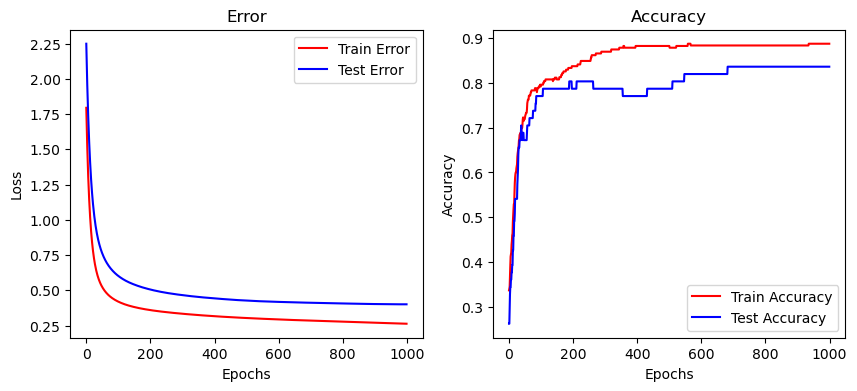

In [119]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
z=np.arange(epochs)
plt.plot(z,train_E, label="Train Error", color='red')
plt.plot(z, test_E, label="Test Error", color='blue')
plt.legend(loc='best')
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(z,train_Acc,label="Train Accuracy",color='red')
plt.plot(z,test_Acc, label="Test Accuracy", color='blue')
plt.legend(loc='best')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

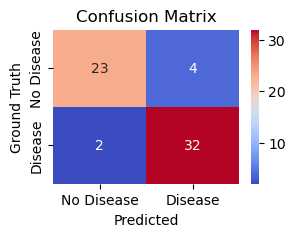

Key Metrics:
              precision    recall  f1-score   support

  No Disease       0.92      0.85      0.88        27
     Disease       0.89      0.94      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [97]:
# Confusion Matrix and Classification Report / Key Metrics

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

conf_matrix = confusion_matrix(y_test, pred_test)

plt.figure(figsize = (3,2))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "coolwarm", xticklabels = ["No Disease", "Disease"], yticklabels = ["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.title("Confusion Matrix") 
plt.savefig("EvaluationPlot2.png")
plt.show()

print("Key Metrics:")
print(classification_report(y_test, pred_test, target_names=["No Disease", "Disease"]))

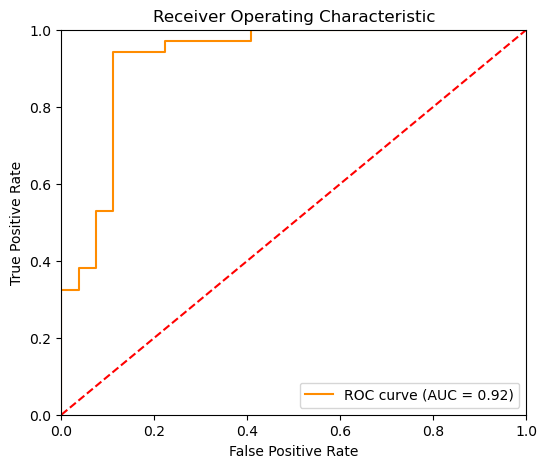

In [99]:
# ROC Curve and AUC

from sklearn.metrics import roc_curve, auc

pred_prob = out2_test  # predicted probability for positive class
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()